In [1]:
import pandas as pd
import numpy as np

# I. Problem 1

For this problem, we will practice using visualization and clustering tools on the small dataset in folder p1.

The data consists of a counts matrix X in file Y and X , along with ground truth labels y. The ground truth labels are not necessary for this part, but you may use them to verify that your results are sensible.

Hint:

1. If you are using R and have difficulties, please review the section Recitation: Demonstration of Data Visualization, Clustering, and Classification, where we clarify the details of R's MDS.

2. If you are using Python and have segmentation fault with TSNE, we recommend set up a new conda environment and install/update the Python (at least Python 3.10) and all other related packages to the latest version.

## 1. Loading the Data

In [3]:
X = np.load('./gene_analysis_data/p1/X.npy')
X.shape

(511, 45768)

In [4]:
y = np.load('./gene_analysis_data/p1/y.npy')
y.shape

(511,)

In [14]:
mx = -1
for a in X:
    if a[0] > mx:
        mx = a[0]
mx

11.941397591320595

In [16]:
X.max(axis=0)

array([ 11.94139759,  16.06640475, 817.73713631, ...,   0.        ,
         0.        ,   0.        ])

## 2. Transform the Data

In [18]:
X_ = np.apply_along_axis(lambda x: np.log2(x+1), 1, X)

In [19]:
X_.max(axis=0)

array([3.69392152, 4.09308726, 9.67725652, ..., 0.        , 0.        ,
       0.        ])

## 3. Principal Components and Explained Variance

In [21]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components to keep
pca = PCA()  # This keeps enough components to explain 95% of the variance

# Fit PCA on the data
pca.fit(X)

# Transform the data to the reduced dimensionality
X__ = pca.transform(X)


In [24]:
X.shape

(511, 45768)

In [23]:
X__.shape

(511, 511)

In [22]:
# Get the variance explained by the first principal component
variance_explained_first_pc_processed = pca.explained_variance_ratio_[0]

print("Variance explained by the first principal component (processed data):", variance_explained_first_pc_processed)

Variance explained by the first principal component (processed data): 0.42779670983572704


In [28]:
# Initialize PCA with the number of components to keep
pca2 = PCA()  # This keeps enough components to explain 95% of the variance

# Fit PCA on the data
pca2.fit(X_)

# Transform the data to the reduced dimensionality
X___ = pca2.transform(X_)

In [29]:
X_.shape

(511, 45768)

In [30]:
X___.shape

(511, 511)

In [31]:
# Get the variance explained by the first principal component
variance_explained_first_pc_processed = pca2.explained_variance_ratio_[0]

print("Variance explained by the first principal component (processed data):", variance_explained_first_pc_processed)

Variance explained by the first principal component (processed data): 0.13887564870826183


In [33]:
# Calculate the cumulative explained variance
cumulative_explained_variance_raw = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance_raw.shape

(511,)

In [35]:
cumulative_explained_variance_processed = np.cumsum(pca2.explained_variance_ratio_)
cumulative_explained_variance_processed.shape

(511,)

In [36]:
# Determine the number of PCs needed to explain 85% of the variance for raw data
num_pcs_85_variance_raw = np.argmax(cumulative_explained_variance_raw >= 0.85) + 1
num_pcs_85_variance_raw

36

In [37]:
# Determine the number of PCs needed to explain 85% of the variance for processed data
num_pcs_85_variance_processed = np.argmax(cumulative_explained_variance_processed >= 0.85) + 1
num_pcs_85_variance_processed

339

In [38]:
print("Number of PCs needed for raw data to explain 85% variance:", num_pcs_85_variance_raw)
print("Number of PCs needed for processed data to explain 85% variance:", num_pcs_85_variance_processed)

Number of PCs needed for raw data to explain 85% variance: 36
Number of PCs needed for processed data to explain 85% variance: 339


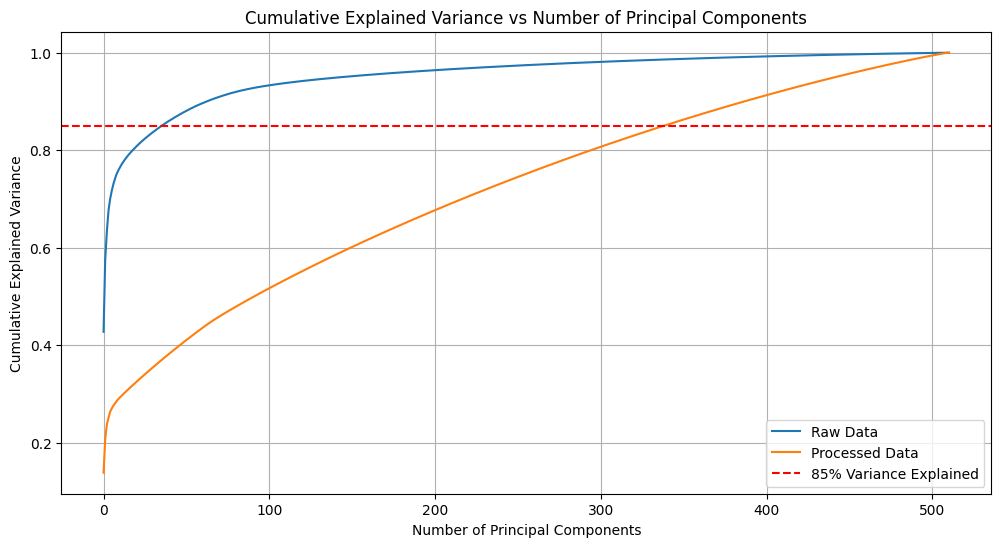

In [40]:
import matplotlib.pyplot as plt
# Plot the cumulative explained variance versus number of PCs
plt.figure(figsize=(12, 6))
plt.plot(cumulative_explained_variance_raw, label='Raw Data')
plt.plot(cumulative_explained_variance_processed, label='Processed Data')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

## 4. Plotting without Visualization Technique

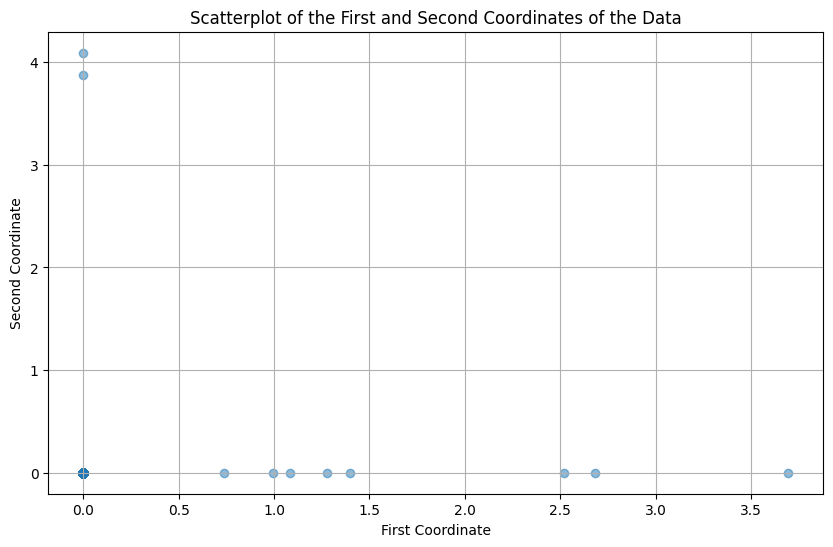

In [41]:
# Extract the first and second coordinates (columns) from the data
x = X_[:, 0]
y = X_[:, 1]

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('First Coordinate')
plt.ylabel('Second Coordinate')
plt.title('Scatterplot of the First and Second Coordinates of the Data')
plt.grid(True)
plt.show()

## 5. PCA
Now find the top two principal components, and make a scatterplot of the projections of the data onto these two PC's.

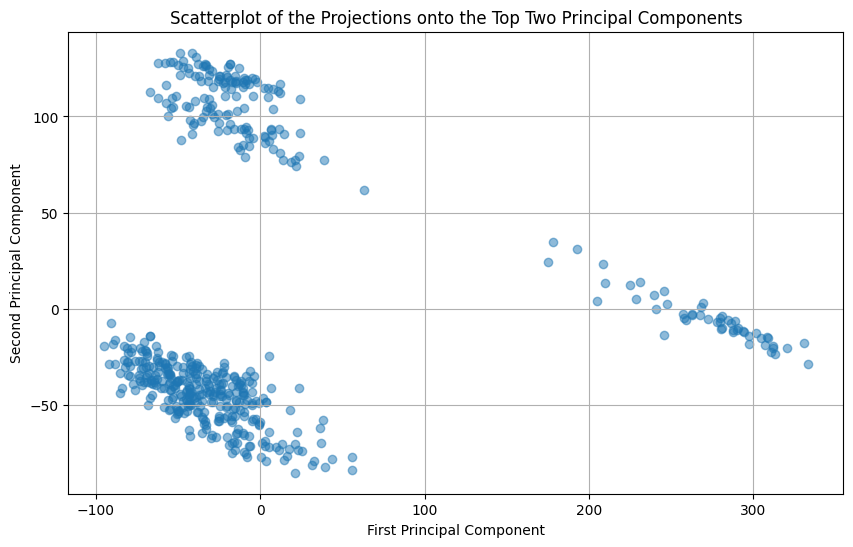

In [42]:
# Extract the projections onto the top two principal components
pc1 = X___[:, 0]
pc2 = X___[:, 1]

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatterplot of the Projections onto the Top Two Principal Components')
plt.grid(True)
plt.show()

## 6. MDS

/home/ha/.local/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


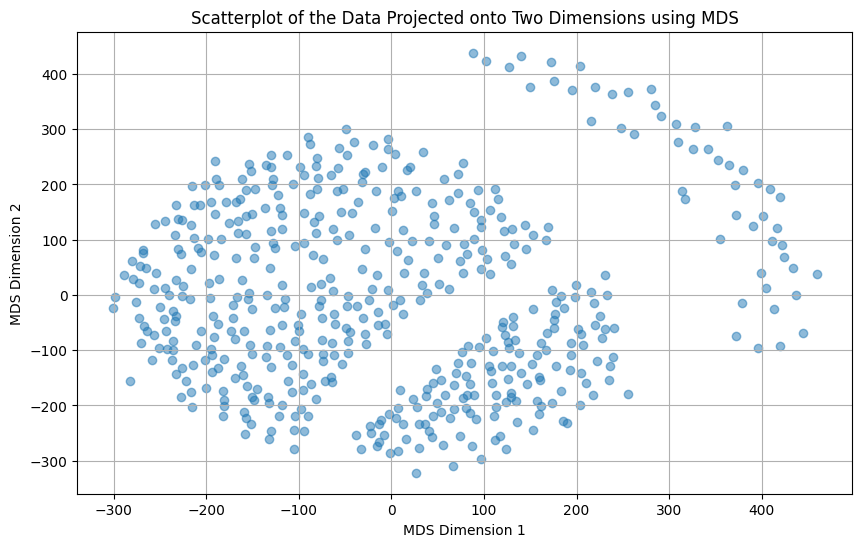

In [43]:
from sklearn.manifold import MDS

# Initialize and fit MDS
mds = MDS(n_components=2, random_state=42)
data_mds = mds.fit_transform(X_)

# Extract the projections onto the new 2D space
mds_dim1 = data_mds[:, 0]
mds_dim2 = data_mds[:, 1]

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(mds_dim1, mds_dim2, alpha=0.5)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('Scatterplot of the Data Projected onto Two Dimensions using MDS')
plt.grid(True)
plt.show()

## 7. t-SNE

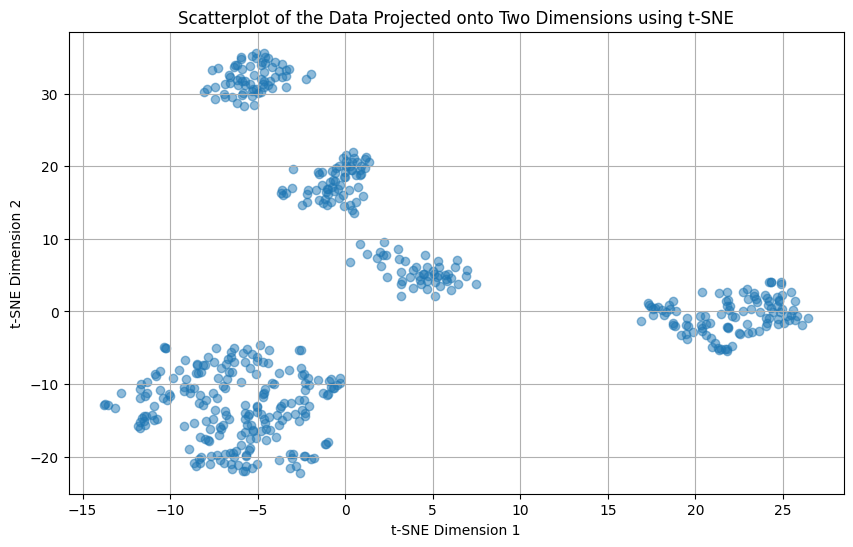

In [44]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Fit PCA to get the top 50 principal components
pca = PCA(n_components=50)
data_pca = pca.fit_transform(X_)

# Step 2: Fit t-SNE to the PCA-transformed data
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
data_tsne = tsne.fit_transform(data_pca)

# Extract the t-SNE projections
tsne_dim1 = data_tsne[:, 0]
tsne_dim2 = data_tsne[:, 1]

# Step 3: Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_dim1, tsne_dim2, alpha=0.5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Scatterplot of the Data Projected onto Two Dimensions using t-SNE')
plt.grid(True)
plt.show()

## 8. Visualizing K-means Clustering

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


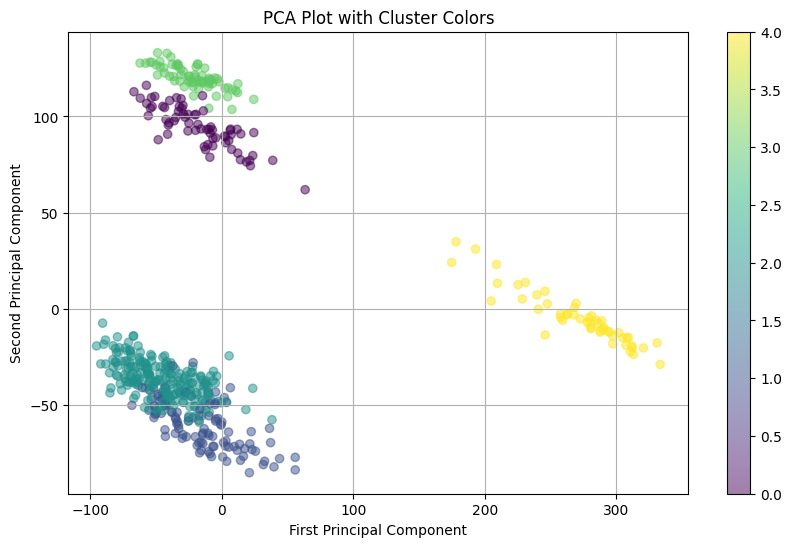

/home/ha/.local/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


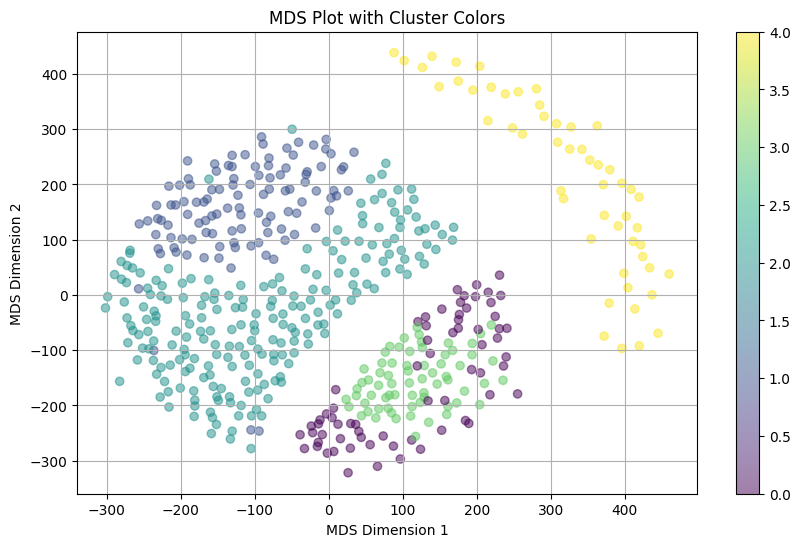

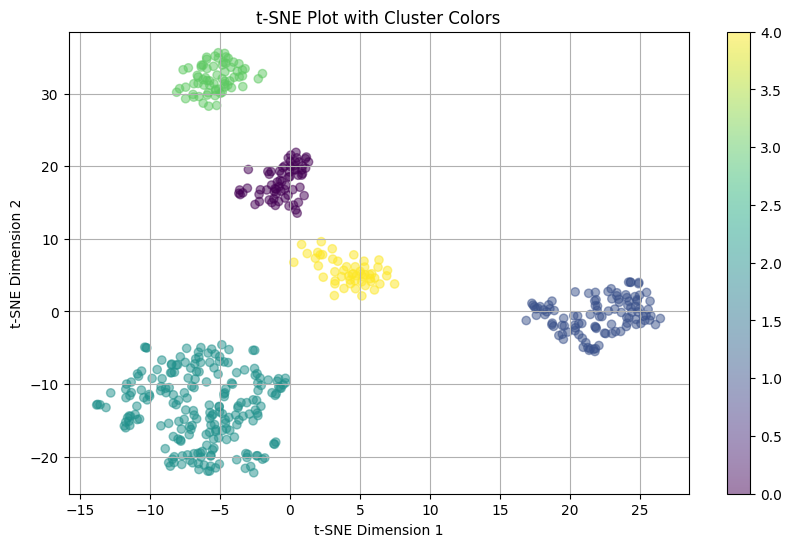

In [46]:
from sklearn.cluster import KMeans

# Run K-Means on the PCA-transformed data
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Function to create scatter plots with cluster colors
def create_scatter_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Step 2: PCA Plot
data_pca_2d = PCA(n_components=2).fit_transform(X_)
create_scatter_plot(data_pca_2d, 'PCA Plot with Cluster Colors', 'First Principal Component', 'Second Principal Component')

# Step 3: MDS Plot
mds = MDS(n_components=2, random_state=42)
data_mds = mds.fit_transform(X_)
create_scatter_plot(data_mds, 'MDS Plot with Cluster Colors', 'MDS Dimension 1', 'MDS Dimension 2')

# Step 4: t-SNE Plot
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
data_tsne = tsne.fit_transform(data_pca)
create_scatter_plot(data_tsne, 't-SNE Plot with Cluster Colors', 't-SNE Dimension 1', 't-SNE Dimension 2')

## 9. Elbow Method

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/skl

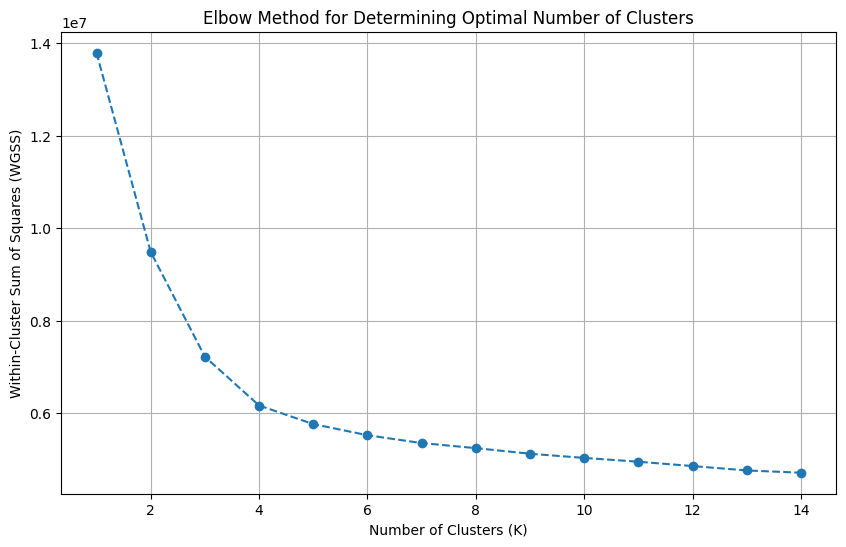

In [47]:
# Range of clusters to try
num_clusters_range = range(1, 15)
wgss = []

# Fit K-Means for each number of clusters and store the WGSS (inertia)
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    wgss.append(kmeans.inertia_)

# Plot WGSS versus number of clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, wgss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WGSS)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [48]:
# Determine the optimal number of clusters (visually inspect the plot to find the elbow)
optimal_num_clusters = 5  # Replace with your chosen number based on the plot

# Fit K-Means with the optimal number of clusters and calculate WGSS
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans_optimal.fit(data_pca)
wgss_optimal = kmeans_optimal.inertia_

print("Number of clusters:", optimal_num_clusters)
print("WGSS at the chosen number of clusters: {:.2f}".format(wgss_optimal))


/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 5
WGSS at the chosen number of clusters: 5764339.92


## 10. Hierarchical Clustering

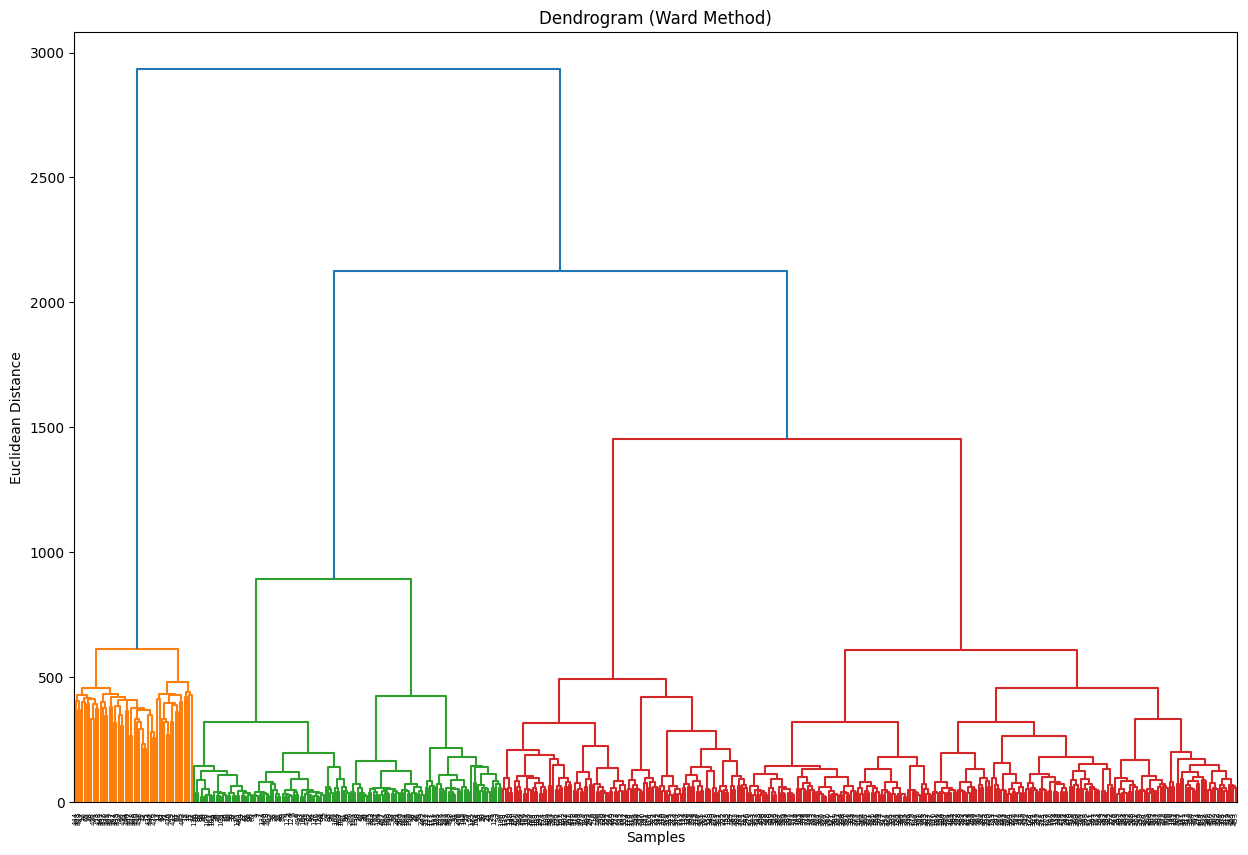

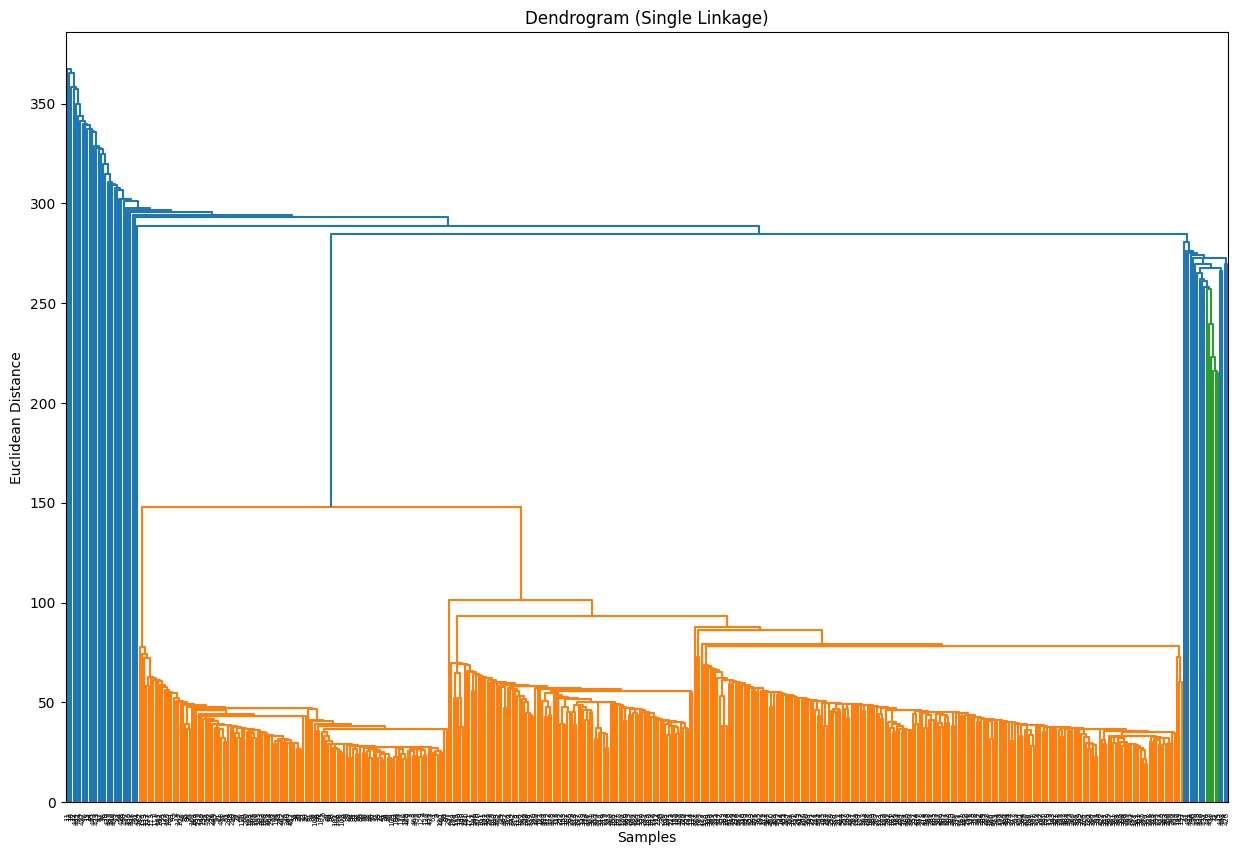

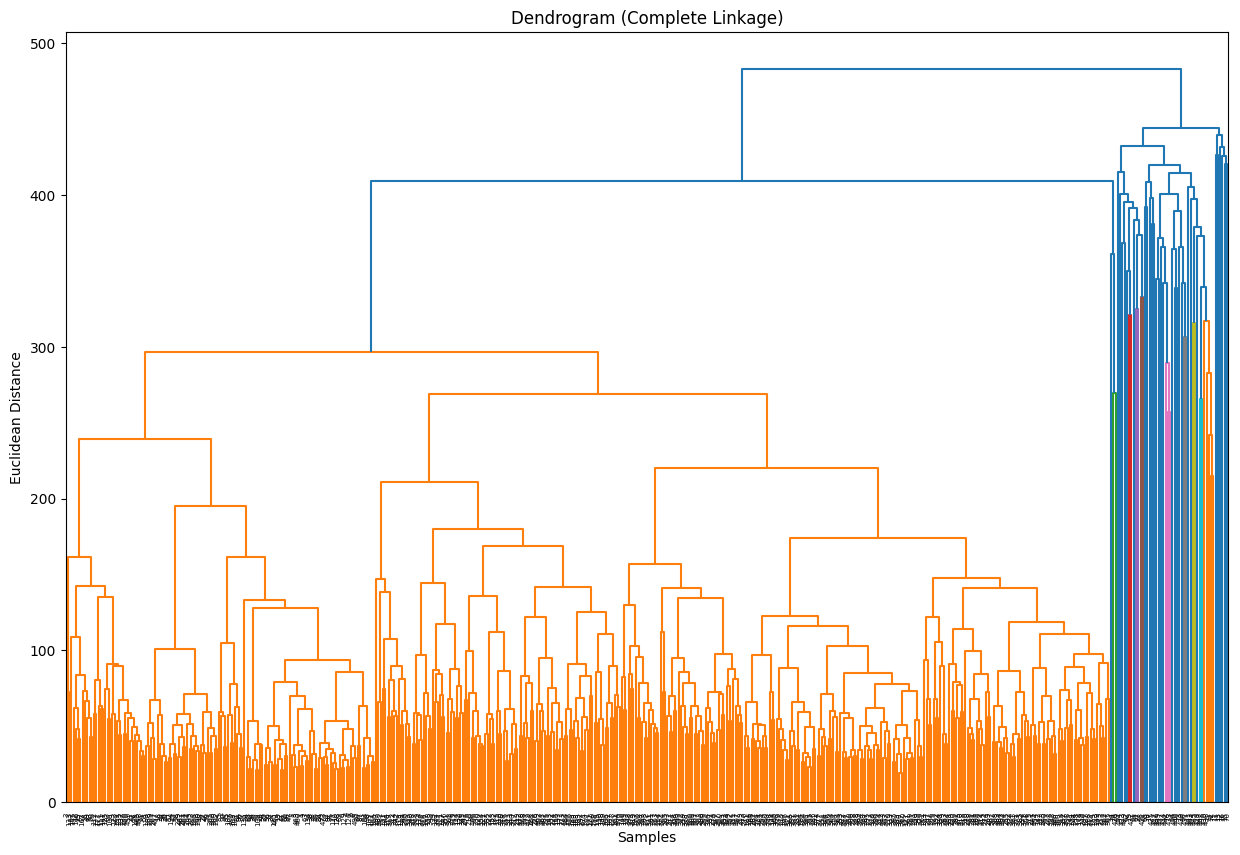

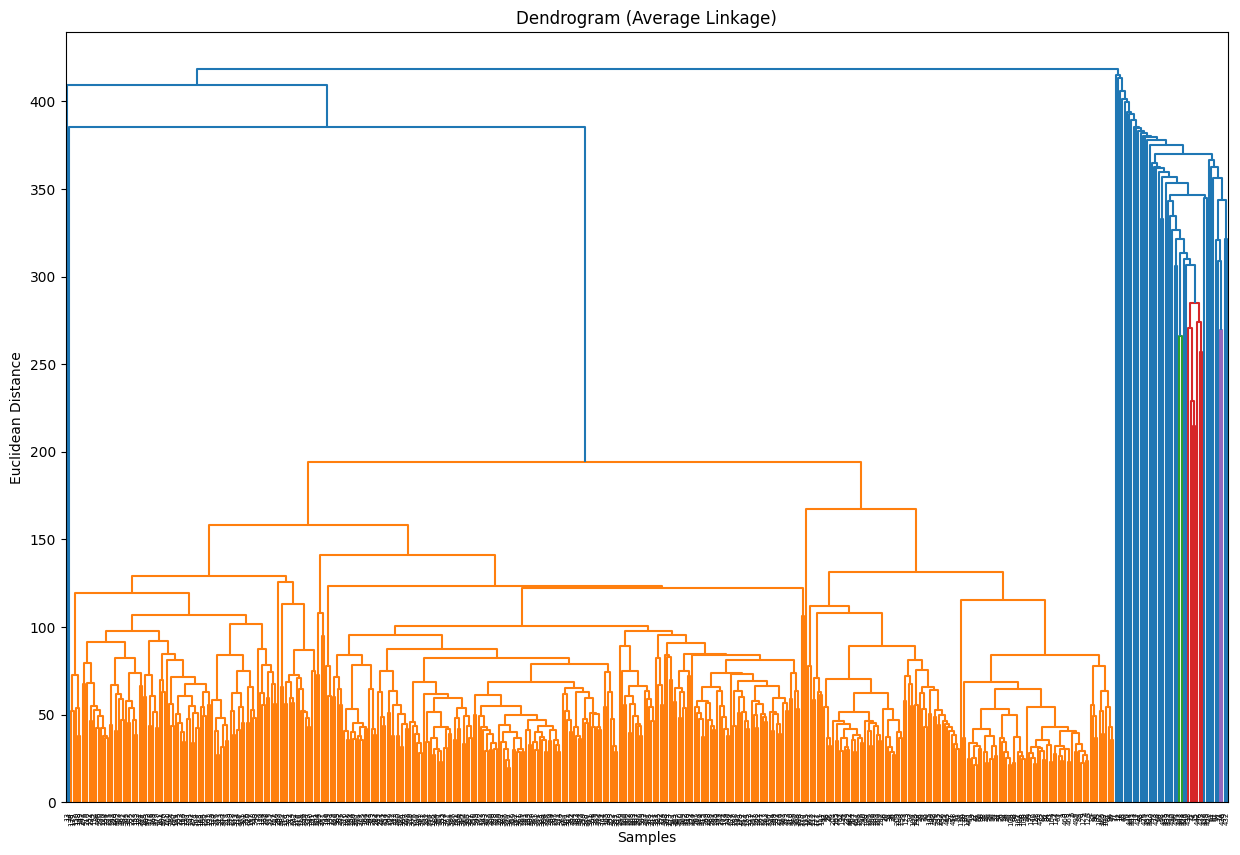

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using Ward's method
Z_ward = linkage(data_pca, method='ward')

# Create the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z_ward)
plt.title('Dendrogram (Ward Method)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Experimenting with different linkages
# Single linkage
Z_single = linkage(data_pca, method='single')
plt.figure(figsize=(15, 10))
dendrogram(Z_single)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Complete linkage
Z_complete = linkage(data_pca, method='complete')
plt.figure(figsize=(15, 10))
dendrogram(Z_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Average linkage
Z_average = linkage(data_pca, method='average')
plt.figure(figsize=(15, 10))
dendrogram(Z_average)
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# II. Problem 2

In [1]:
import numpy as np

In [2]:
X = np.load('./gene_analysis_data/p2_unsupervised/X.npy')
X.shape

(2169, 45768)

In [3]:
X.max(axis=0)

array([  61.77721743,    0.        , 1183.63034554, ...,    0.        ,
          0.        ,    0.        ])

In [4]:
X_ = np.apply_along_axis(lambda x: np.log2(x+1), 1, X)
X_.max(axis=0)

array([ 5.97216918,  0.        , 10.21022123, ...,  0.        ,
        0.        ,  0.        ])